In [8]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import edhec_risk_kit202 as erk
import pandas as pd
import numpy as np

ind = erk.get_ind_returns()
er = erk.annualize_rets(ind["1996":"2000"], 12)
cov = ind["1996":"2000"].cov()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
def portfolio_return(weights, returns):
    """
    Weights -> Returns
    """
    return weights.T @ returns

def portfolio_vol(weights, covmat):
    """
    Weights -> Vol
    """
    return (weights.T @covmat @ weights)**0.5


In [10]:
l = ["Food", "Beer", "Smoke", "Coal"]
er[l]

Food     0.116799
Beer     0.141126
Smoke    0.107830
Coal     0.414689
dtype: float64

In [11]:
cov.loc[l, l]

,Food,Beer,Smoke,Coal
Food,0.002609,0.002379,0.002061,0.000027
Beer,0.002379,0.005264,0.001359,0.001728
Smoke,0.002061,0.001359,0.008349,-0.000733
Coal,0.000027,0.001728,-0.000733,0.018641


In [13]:
weights = np.repeat(1/4, 4)

array([0.25, 0.25, 0.25, 0.25])

In [15]:
erk.portfolio_return(weights, er[l])

0.19511097196038385

In [17]:
erk.portfolio_vol(weights, cov.loc[l,l])

0.05505919577643704

# **2 Asset Case**


In [20]:
t = ["Games", "Fin"]

In [27]:
n_points = 21
weights = [np.array([w, 1-w]) for w in np.linspace(0, 1, n_points)]
weights

[array([0., 1.]),
 array([0.05, 0.95]),
 array([0.1, 0.9]),
 array([0.15, 0.85]),
 array([0.2, 0.8]),
 array([0.25, 0.75]),
 array([0.3, 0.7]),
 array([0.35, 0.65]),
 array([0.4, 0.6]),
 array([0.45, 0.55]),
 array([0.5, 0.5]),
 array([0.55, 0.45]),
 array([0.6, 0.4]),
 array([0.65, 0.35]),
 array([0.7, 0.3]),
 array([0.75, 0.25]),
 array([0.8, 0.2]),
 array([0.85, 0.15]),
 array([0.9, 0.1]),
 array([0.95, 0.05]),
 array([1., 0.])]

In [28]:
len(weights)

21

In [30]:
t

['Games', 'Fin']

<Axes: xlabel='Vol', ylabel='R'>

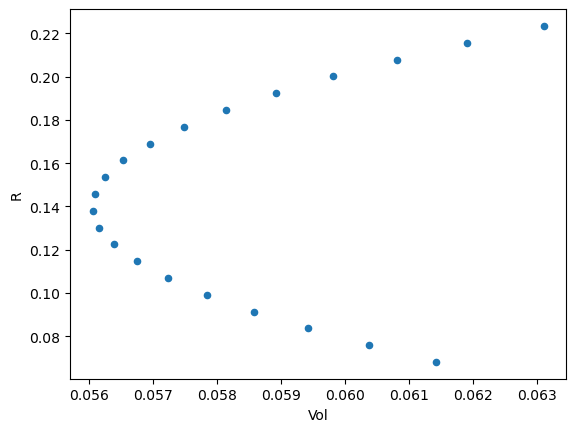

In [48]:
rets = [erk.portfolio_return(w, er[t]) for w in weights]
vols = [erk.portfolio_vol(w, cov.loc[t, t]) for w in weights]
ef = pd.DataFrame ({"R":rets, "Vol": vols})
ef.plot.scatter(x = "Vol", y = "R")

<Axes: xlabel='Volatility'>

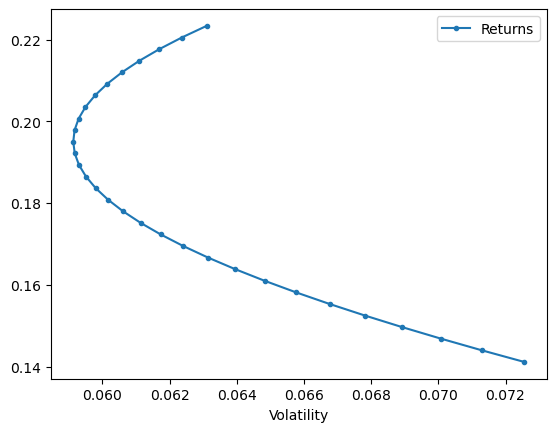

In [51]:
l = ["Fin", "Beer"]
erk.plot_ef2(30, er[l], cov.loc[l, l])